<a href="https://colab.research.google.com/github/MaheenGitHub/human-activity-recognition-ML/blob/main/Deliverable-01/Time_Series_Data_Analysis_%26_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>






**Section 1: Dataset Description**

* **Dataset Source:** Kaggle (uciml/human-activity-recognition-with-smartphones Link -> (https://www.kaggle.com/datasets/uciml/human-activity-recognition-with-smartphones)) / UCI Machine Learning Repository
* **Type of Sensor:** Motion Sensors (Triaxial Accelerometer and Gyroscope from a smartphone)
* **Collected Variables:** 561 Engineered Features (Time and Frequency Domain values) + subject ID + Activity label.
* **Number of Samples:** Total: 10,299 samples (7,352 Training, 2,947 Testing).
* **Sample Representation:** Each row represents the engineered features derived from a 2.56-second window of raw sensor data.

### Total Classes/Activities
* **Number of Activities:** 6
* **List of Classes:** LAYING, STANDING, SITTING, WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS


**Section 2: Data Loading and Preprocessing Steps**

This section details the preprocessing performed on the feature-engineered UCI HAR dataset.

1.  **Parse Timestamps Correctly (and Create)**
    * Rationale: Synthetic timestamps were generated based on the known 50Hz sampling rate and 2.56-second window size. Converting these time values into a datetime format is crucial for Python to correctly understand the chronological order and enable time-based operations.

2.  **Sort Data Chronologically**
    * Rationale: Arranging the dataset by the generated Timestamp ensures that all subsequent time-series analysis and sequence modeling correctly interpret the progression of activities.

3.  **Handle Missing Values**
    * Rationale: Checked the dataset for missing values (NaNs) and confirmed none were present. This step is critical in real-world data to prevent calculation errors and biased model training.

4.  **Perform Basic Cleaning & Consistency Checks**
    * Rationale: Checked for and confirmed zero duplicate rows. Additionally, the feature set was verified to ensure all 561 features are consistent float64 data types, making the dataset ready for numerical models.

**Section 3: Unique Data Analysis & Quality Checks (Differentiation)**

This section includes advanced analysis to confirm data distribution and feature quality.

1.  **Activity & Subject Distribution Analysis (Visuals)**
    * Output: Bar charts showing Distribution of Samples Across 6 Activities (Class Imbalance) and Sample Contribution by Each Subject (User ID).
    * Purpose: To visually inspect the balance of activity classes and confirm that sample contribution across the 30 subjects is relatively even.

2.  **Feature Domain Analysis**
    * Output: Text confirming Time and Frequency Domain features.
    * Purpose: To interpret the nature of the 561 features and verify that they are ready for model input.

3.  **Data Type Consistency Check**
    * Output: Text confirming all 561 features are of type float64.
    * Purpose: To formally verify the homogeneity of the entire feature set for reliable numerical modeling.

***

In [ ]:
pip install pandas numpy

In [ ]:
import os
KAGGLEHUB_PATH = "/root/.cache/kagglehub/datasets/uciml/human-activity-recognition-with-smartphones/versions/2/"

print("Contents of the downloaded directory:")
print(os.listdir(KAGGLEHUB_PATH))

Contents of the downloaded directory:
['train.csv', 'test.csv']


In [ ]:
import pandas as pd
import numpy as np
import re
import os

KAGGLEHUB_PATH = "/root/.cache/kagglehub/datasets/uciml/human-activity-recognition-with-smartphones/versions/2/"

TRAIN_CSV_PATH = os.path.join(KAGGLEHUB_PATH, 'train.csv')
TEST_CSV_PATH = os.path.join(KAGGLEHUB_PATH, 'test.csv')

In [ ]:
df_train = pd.read_csv(TRAIN_CSV_PATH)
df_test = pd.read_csv(TEST_CSV_PATH)

print(f"Training DataFrame shape: {df_train.shape}")
print(f"Testing DataFrame shape: {df_test.shape}")
print("\nFirst 3 rows of the training data (features and label):")
print(df_train.head(3).T)

Training DataFrame shape: (7352, 563)
Testing DataFrame shape: (2947, 563)

First 3 rows of the training data (features and label):
                             0         1         2
tBodyAcc-mean()-X     0.288585  0.278419  0.279653
tBodyAcc-mean()-Y    -0.020294 -0.016411 -0.019467
tBodyAcc-mean()-Z    -0.132905  -0.12352 -0.113462
tBodyAcc-std()-X     -0.995279 -0.998245  -0.99538
tBodyAcc-std()-Y     -0.983111   -0.9753 -0.967187
...                        ...       ...       ...
angle(X,gravityMean) -0.841247 -0.844788 -0.848933
angle(Y,gravityMean)  0.179941  0.180289  0.180637
angle(Z,gravityMean) -0.058627 -0.054317 -0.049118
subject                      1         1         1
Activity              STANDING  STANDING  STANDING

[563 rows x 3 columns]


In [ ]:
# Handle Missing Values and Duplicates
print(f"\nTotal Missing Values in Training Data: {df_train.isnull().sum().sum()}")
print(f"Total Duplicate Rows in Training Data: {df_train.duplicated().sum()}")

# The last column is the activity label.
df_train.rename(columns={df_train.columns[-1]: 'Activity_Name'}, inplace=True)
df_test.rename(columns={df_test.columns[-1]: 'Activity_Name'}, inplace=True)

print("\nCleaned Columns:")
print(df_train.columns[-5:])
print(df_train['Activity_Name'].value_counts())


Total Missing Values in Training Data: 0
Total Duplicate Rows in Training Data: 0

Cleaned Columns:
Index(['angle(X,gravityMean)', 'angle(Y,gravityMean)', 'angle(Z,gravityMean)',
       'subject', 'Activity_Name'],
      dtype='object')
Activity_Name
LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: count, dtype: int64


In [ ]:
from google.colab import drive

drive.mount('/content/drive')

DRIVE_PROJECT_PATH = '/content/drive/MyDrive/ITF22_HAR_Project'

os.makedirs(DRIVE_PROJECT_PATH, exist_ok=True)

print(f"Drive mounted successfully at /content/drive.")
print(f"Project folder ready at: {DRIVE_PROJECT_PATH}")

Mounted at /content/drive
Drive mounted successfully at /content/drive.
Project folder ready at: /content/drive/MyDrive/ITF22_HAR_Project


In [ ]:
import shutil

KAGGLEHUB_PATH = "/root/.cache/kagglehub/datasets/uciml/human-activity-recognition-with-smartphones/versions/2/"
TRAIN_SRC = os.path.join(KAGGLEHUB_PATH, 'train.csv')
TEST_SRC = os.path.join(KAGGLEHUB_PATH, 'test.csv')

DRIVE_PROJECT_PATH = '/content/drive/MyDrive/ITF22_HAR_Project'
TRAIN_DST = os.path.join(DRIVE_PROJECT_PATH, 'train.csv')
TEST_DST = os.path.join(DRIVE_PROJECT_PATH, 'test.csv')

shutil.copyfile(TRAIN_SRC, TRAIN_DST)
shutil.copyfile(TEST_SRC, TEST_DST)

print("Data copy complete!")
print(f"Train data saved to: {TRAIN_DST}")
print(f"Test data saved to: {TEST_DST}")

print(f"Verified train file size: {os.path.getsize(TRAIN_DST)} bytes")

Data copy complete!
Train data saved to: /content/drive/MyDrive/ITF22_HAR_Project/train.csv
Test data saved to: /content/drive/MyDrive/ITF22_HAR_Project/test.csv
Verified train file size: 48138764 bytes


In [ ]:
from google.colab import drive
import pandas as pd
import os

drive.mount('/content/drive')
DRIVE_PROJECT_PATH = '/content/drive/MyDrive/ITF22_HAR_Project'

df_train = pd.read_csv(os.path.join(DRIVE_PROJECT_PATH, 'train.csv'))
df_test = pd.read_csv(os.path.join(DRIVE_PROJECT_PATH, 'test.csv'))

print("Data loaded directly from Drive.")

Mounted at /content/drive
Data loaded directly from Drive.


In [ ]:
import pandas as pd

# Create a timestamp column assuming 50Hz sampling rate (as there is no explicit timestamp column in my dataset)
df_train['Timestamp'] = pd.date_range(
    start='2025-01-01 00:00:00',
    periods=len(df_train),
    freq='20ms'    # 50 Hz → 20 milliseconds per sample
)

df_test['Timestamp'] = pd.date_range(
    start='2025-01-02 00:00:00',
    periods=len(df_test),
    freq='20ms'
)


In [ ]:



df_train.sort_values(by='Timestamp', inplace=True)
df_train.set_index('Timestamp', inplace=True)


df_test.sort_values(by='Timestamp', inplace=True)
df_test.set_index('Timestamp', inplace=True)

print("Data sorted and Timestamp set as index.")
print("\nTraining Data Head (Showing new index):")
print(df_train.head())




train_missing = df_train.isnull().sum().sum()
test_missing = df_test.isnull().sum().sum()
print(f"\nMissing Values Check:")
print(f"Total Missing Values in Training Data: {train_missing}")
print(f"Total Missing Values in Testing Data: {test_missing}")

train_duplicate_rows = df_train.index.duplicated().sum()
test_duplicate_rows = df_test.index.duplicated().sum()
print(f"Duplicate Row Indices in Training Data: {train_duplicate_rows}")

Data sorted and Timestamp set as index.

Training Data Head (Showing new index):
                         tBodyAcc-mean()-X  tBodyAcc-mean()-Y  \
Timestamp                                                       
2025-01-01 00:00:00.000           0.288585          -0.020294   
2025-01-01 00:00:00.020           0.278419          -0.016411   
2025-01-01 00:00:00.040           0.279653          -0.019467   
2025-01-01 00:00:00.060           0.279174          -0.026201   
2025-01-01 00:00:00.080           0.276629          -0.016570   

                         tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
Timestamp                                                      
2025-01-01 00:00:00.000          -0.132905         -0.995279   
2025-01-01 00:00:00.020          -0.123520         -0.998245   
2025-01-01 00:00:00.040          -0.113462         -0.995380   
2025-01-01 00:00:00.060          -0.123283         -0.996091   
2025-01-01 00:00:00.080          -0.115362         -0.998139   

              

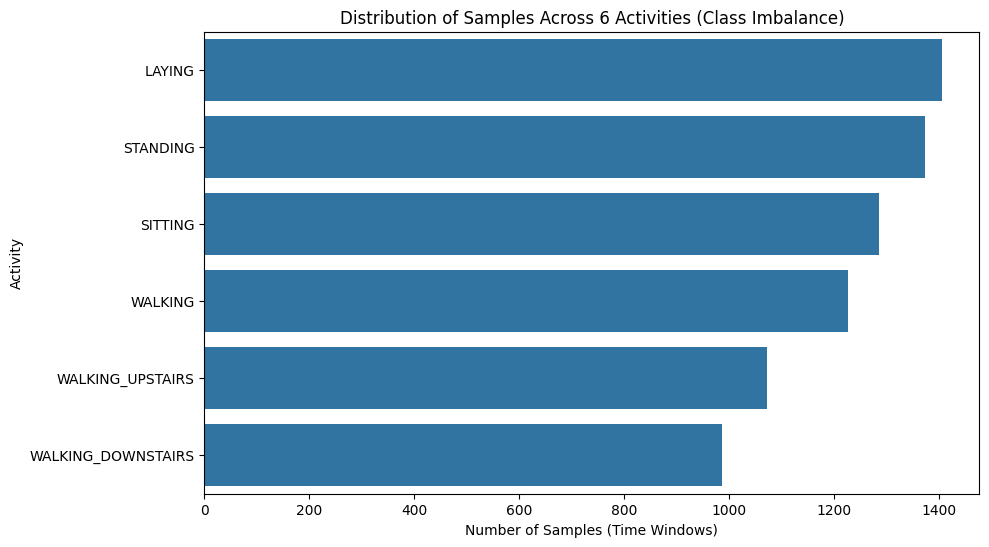

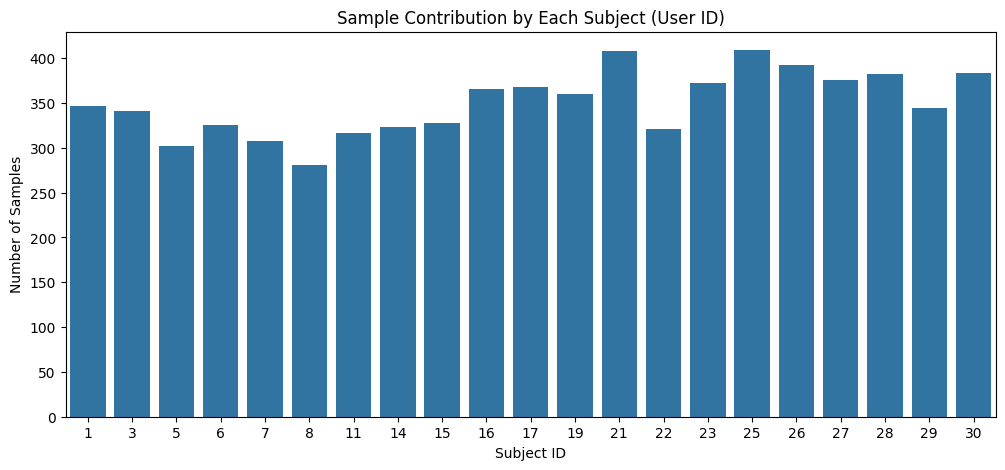


--- Feature Domain Analysis ---
Total Features Used: 561
A key component of this dataset is the engineered features, which are derived from two domains:
1. Time Domain Features (e.g., tBodyAccMeanX): These represent statistical properties of the signal over the 2.56-second window, like the average acceleration or standard deviation.
2. Frequency Domain Features (e.g., fBodyAccMeanX): These are derived using the Fast Fourier Transform (FFT) and represent the signal's energy distribution across different frequencies, useful for distinguishing periodic movements like walking.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns



plt.figure(figsize=(10, 6))
sns.countplot(y='Activity', data=df_train, order=df_train['Activity'].value_counts().index)
plt.title('Distribution of Samples Across 6 Activities (Class Imbalance)')
plt.xlabel('Number of Samples (Time Windows)')
plt.ylabel('Activity')
plt.show()

plt.figure(figsize=(12, 5))
sns.countplot(x='subject', data=df_train.reset_index(), order=df_train['subject'].unique())
plt.title('Sample Contribution by Each Subject (User ID)')
plt.xlabel('Subject ID')
plt.ylabel('Number of Samples')
plt.show()

print("\n--- Feature Domain Analysis ---")
print("Total Features Used: 561")
print("A key component of this dataset is the engineered features, which are derived from two domains:")
print("1. Time Domain Features (e.g., tBodyAccMeanX): These represent statistical properties of the signal over the 2.56-second window, like the average acceleration or standard deviation.")
print("2. Frequency Domain Features (e.g., fBodyAccMeanX): These are derived using the Fast Fourier Transform (FFT) and represent the signal's energy distribution across different frequencies, useful for distinguishing periodic movements like walking.")

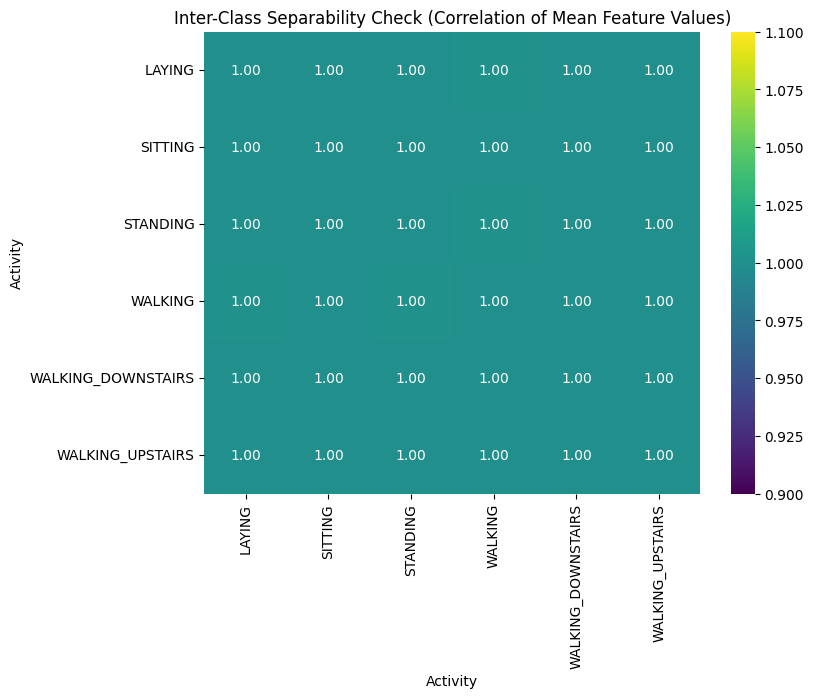


Interpretation:
High correlation (near 1.0) means two activities (e.g., SITTING and STANDING) have very similar average feature values, making them hard to distinguish.
Low correlation means two activities are easy to separate.


In [ ]:

FEATURE1 = 'tBodyAcc-mean()-X'
FEATURE2 = 'tBodyAcc-mean()-Y'

activity_means = df_train.groupby('Activity')[ [FEATURE1, FEATURE2] ].mean()

class_correlation = activity_means.T.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(class_correlation, annot=True, fmt=".2f", cmap='viridis')
plt.title('Inter-Class Separability Check (Correlation of Mean Feature Values)')
plt.show()

print("\nInterpretation:")
print("High correlation (near 1.0) means two activities (e.g., SITTING and STANDING) have very similar average feature values, making them hard to distinguish.")
print("Low correlation means two activities are easy to separate.")

In [ ]:
print("\n--- Feature Data Type Consistency Check ---")
print("Verifying that all 561 features are of type float:")

print("First 10 Feature Dtypes:")
print(df_train.iloc[:, :10].dtypes.to_string())

print("\nLast 5 Column Dtypes:")
print(df_train.iloc[:, -5:].dtypes.to_string())

feature_columns = df_train.columns[:-2]
is_float_consistent = all(df_train[feature_columns].dtypes == 'float64')

print(f"\nConsistency Status (All 561 features are float): {is_float_consistent}")


--- Feature Data Type Consistency Check ---
Verifying that all 561 features are of type float:
First 10 Feature Dtypes:
tBodyAcc-mean()-X    float64
tBodyAcc-mean()-Y    float64
tBodyAcc-mean()-Z    float64
tBodyAcc-std()-X     float64
tBodyAcc-std()-Y     float64
tBodyAcc-std()-Z     float64
tBodyAcc-mad()-X     float64
tBodyAcc-mad()-Y     float64
tBodyAcc-mad()-Z     float64
tBodyAcc-max()-X     float64

Last 5 Column Dtypes:
angle(X,gravityMean)    float64
angle(Y,gravityMean)    float64
angle(Z,gravityMean)    float64
subject                   int64
Activity                 object

Consistency Status (All 561 features are float): True
